# **Hareer Alnamassi - حرير النماصي
hareerfn@gmail.com
tuwaiq program
AI & Drones
by: eng. Faris**
```

```



# Segmentation (trained on YOLOv8):  ❇

# note- ❗
 this part involve Segmentation with dataset i see it not usable in tello , it may help to detect the flyes as the butterfly one of them .                                      so the next part is use tello commands but it's detection .                  this happen due to limitation of the dataset availability **





# kaggle link ▶ :https://www.kaggle.com/code/deepakat002/yolov11-segmentation-butterfly

In [10]:
pip install shutil


ERROR: Could not find a version that satisfies the requirement shutil (from versions: none)
ERROR: No matching distribution found for shutil


In [11]:
import os
import random
import cv2
import numpy as np
from IPython.display import display, Image
from tqdm import tqdm
import random
import matplotlib.pyplot as plt
import os
import yaml

import shutil

In [12]:
pip install ultralytics

In [13]:

from ultralytics import YOLO


In [9]:
from google.colab import drive

In [14]:
from google.colab import drive

drive.mount('/content/drive')
data='/content/drive/MyDrive/yolov8_butterfly'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
def load_annotations(annotation_path, img_width, img_height):
    annotations = []
    with open(annotation_path, 'r') as file:
        for line in file:
            coords = line.strip().split()[1:]
            scaled_points = [(int(float(coords[i]) * img_width), int(float(coords[i+1]) * img_height)) for i in range(0, len(coords), 2)]
            annotations.append(scaled_points)
    return annotations

In [16]:
def overlay_mask(image, annotations):
    mask_image = np.zeros_like(image)
    for points in annotations:
        color = [random.randint(0, 255) for _ in range(3)]
        cv2.fillPoly(mask_image, [np.array(points, dtype=np.int32)], color)
    return cv2.addWeighted(mask_image, 0.5, image, 0.5, 0)


In [17]:
def process_images(dataset_folder, num_images=5):
    image_files = [f for f in os.listdir(dataset_folder) if f.endswith(('.jpeg', '.jpg', '.png'))]
    for img_file in random.sample(image_files, num_images):
        img = cv2.imread(f'{dataset_folder}/{img_file}')
        annotation_path = f'{dataset_folder}/{img_file.rsplit(".", 1)[0]}.txt'
        if not os.path.exists(annotation_path):
            print(f"Annotation not found for {img_file}")
            continue
        img_height, img_width = img.shape[:2]
        annotations = load_annotations(annotation_path, img_width, img_height)
        result_img = overlay_mask(img.copy(), annotations)
        cv2.imwrite(f'masked_{img_file}', result_img)
        display(Image(data=cv2.imencode('.png', result_img)[1].tobytes()))

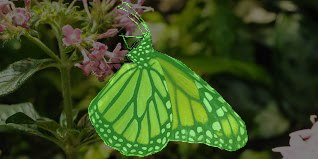

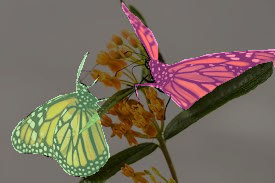

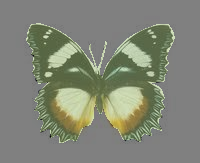

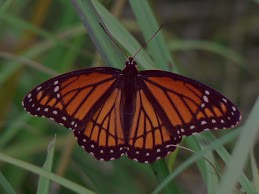

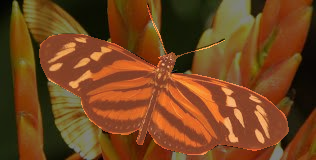

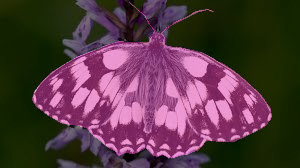

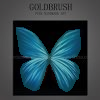

In [18]:
process_images(data, num_images=7)

In [30]:



def create_yaml(train_path, val_path, class_names):
    with open('dataset.yaml', 'w') as f:
        yaml.dump({
            "train": f"/content/{train_path}",
            "val": f"/content/{val_path}",
            "nc": len(class_names),
            "names": class_names
        }, f, sort_keys=False)
        print(yaml.dump(data_yaml, sort_keys=False))


In [21]:
model = YOLO('yolov8n.pt')


In [32]:
results = model.train(data="/content/dataset.yaml", epochs=20, imgsz=480, optimizer="AdamW")


# i set the epoches to 20 , this is my computer capability

Ultralytics 8.3.75 🚀 Python-3.10.12 torch-2.5.1+cpu CPU (AMD EPYC 7B13)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dataset.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=480, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train9, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_w

train: Scanning /content/train/labels.cache... 240 images, 0 backgrounds, 0 corrupt: 100%|██████████| 240/240 [00:00<?, ?it/s]
val: Scanning /content/val/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]


Plotting labels to runs/detect/train9/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 480 train, 480 val
Using 0 dataloader workers
Logging results to runs/detect/train9
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      1.063      1.744      1.287         54        480: 100%|██████████| 15/15 [00:12<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         60         70       0.32      0.414      0.302     0.0985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G      1.353       1.56      1.509         50        480: 100%|██████████| 15/15 [00:12<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.00it/s]

                   all         60         70     0.0161      0.286     0.0108    0.00285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G      1.343      1.438      1.477         47        480: 100%|██████████| 15/15 [00:12<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

                   all         60         70      0.027      0.214      0.033     0.0107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G      1.466      1.488      1.537         47        480: 100%|██████████| 15/15 [00:12<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]

                   all         60         70      0.121     0.0571     0.0458    0.00975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G      1.414      1.415      1.503         36        480: 100%|██████████| 15/15 [00:12<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]

                   all         60         70        0.5     0.0143      0.035     0.0122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G      1.463      1.384       1.52         62        480: 100%|██████████| 15/15 [00:12<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all         60         70      0.111     0.0143    0.00427   0.000705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G      1.407      1.293      1.503         51        480: 100%|██████████| 15/15 [00:13<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all         60         70    0.00738     0.0571    0.00439   0.000806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G      1.298      1.184      1.444         42        480: 100%|██████████| 15/15 [00:12<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all         60         70      0.369      0.529      0.449      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G      1.302      1.182      1.415         50        480: 100%|██████████| 15/15 [00:12<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         60         70      0.575      0.643      0.591      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G       1.22      1.132       1.38         45        480: 100%|██████████| 15/15 [00:12<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]

                   all         60         70      0.563      0.644      0.586       0.29


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20         0G      1.205      1.215      1.532         17        480: 100%|██████████| 15/15 [00:12<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all         60         70       0.54      0.343      0.392      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G      1.228      1.046      1.541         16        480: 100%|██████████| 15/15 [00:13<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all         60         70      0.357        0.4      0.272      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G      1.163     0.9568      1.493         18        480: 100%|██████████| 15/15 [00:12<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         60         70      0.473      0.564      0.528      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G      1.111     0.9303      1.428         17        480: 100%|██████████| 15/15 [00:11<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all         60         70      0.485      0.557      0.527      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G      1.061     0.8891      1.371         19        480: 100%|██████████| 15/15 [00:12<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.90it/s]

                   all         60         70       0.61      0.743      0.645      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G      1.072     0.9122      1.394         19        480: 100%|██████████| 15/15 [00:12<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

                   all         60         70      0.796      0.629      0.744      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G     0.9957     0.8487      1.356         21        480: 100%|██████████| 15/15 [00:12<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all         60         70      0.764      0.729      0.775      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G     0.9665     0.8181      1.335         16        480: 100%|██████████| 15/15 [00:12<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.99it/s]

                   all         60         70      0.881      0.843      0.864      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G     0.9026     0.7738      1.286         17        480: 100%|██████████| 15/15 [00:12<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         60         70      0.922      0.857      0.885       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G     0.8505      0.687      1.236         22        480: 100%|██████████| 15/15 [00:12<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         60         70      0.872      0.879      0.904      0.632



20 epochs completed in 0.079 hours.
Optimizer stripped from runs/detect/train9/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train9/weights/best.pt, 6.2MB

Validating runs/detect/train9/weights/best.pt...
Ultralytics 8.3.75 🚀 Python-3.10.12 torch-2.5.1+cpu CPU (AMD EPYC 7B13)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  2.00it/s]


                   all         60         70      0.872      0.879      0.904      0.631
Speed: 0.3ms preprocess, 12.8ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/train9


In [35]:

# i run it in VS code , the camera supported there , of course i change the drivefolders  into my local
def run_yolov8_segmentation_on_stream(model_path):

    model = YOLO(model_path)
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Error: Could not open webcam.")
        return

    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Failed to capture image.")
            break
        results = model.predict(frame, conf=0.7, iou=0.7)
        result_image = results[0].plot()
        cv2.imshow("Segmentation", result_image)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
model_weights_path = "path_to_your_model_weights/yolov8n.pt"

run_yolov8_segmentation_on_stream(model_weights_path)


Error: Could not open webcam.


# **Tello part ⏪**

In [ ]:
pip install djitellopy

In [ ]:
from djitellopy import Tello
import cv2
import time

tello = Tello()
tello.connect()
tello.streamon()
time.sleep(2)
try:
    while True:

        frame = tello.get_frame_read().frame
        cv2.imshow("Tello Camera Stream", frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
finally:
    tello.streamoff()
    tello.end()


    cv2.destroyAllWindows()
